In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df = pd.read_excel('personal finance data.xlsx') 
df.head()

,Date / Time,Mode,Category,Sub category,Income/Expense,Debit/Credit
0,2021-01-01 21:45:00,CUB - online payment,Allowance,From dad,Income,8000.0
1,2021-01-01 21:46:00,CUB - online payment,Food,Snacks,Expense,85.0
2,2021-01-03 18:21:00,CUB - online payment,Other,From dad,Income,500.0
3,2021-01-03 18:22:00,CUB - online payment,Household,Stuffs,Expense,6667.0
4,2021-01-03 18:56:00,CUB - online payment,Transportation,Metro,Expense,30.0


In [45]:
df['Date'] = pd.to_datetime(df['Date / Time'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [46]:
df.isnull().sum()

Date / Time       0
Mode              0
Category          0
Sub category      0
Income/Expense    0
Debit/Credit      0
Date              0
Year              0
Month             0
Day               0
dtype: int64

In [47]:
df['Income/Expense'] = df['Income/Expense'].map({'Income':1, 'Expense':0})

In [48]:
df.head()

,Date / Time,Mode,Category,Sub category,Income/Expense,Debit/Credit,Date,Year,Month,Day
0,2021-01-01 21:45:00,CUB - online payment,Allowance,From dad,1,8000.0,2021-01-01 21:45:00,2021,1,1
1,2021-01-01 21:46:00,CUB - online payment,Food,Snacks,0,85.0,2021-01-01 21:46:00,2021,1,1
2,2021-01-03 18:21:00,CUB - online payment,Other,From dad,1,500.0,2021-01-03 18:21:00,2021,1,3
3,2021-01-03 18:22:00,CUB - online payment,Household,Stuffs,0,6667.0,2021-01-03 18:22:00,2021,1,3
4,2021-01-03 18:56:00,CUB - online payment,Transportation,Metro,0,30.0,2021-01-03 18:56:00,2021,1,3


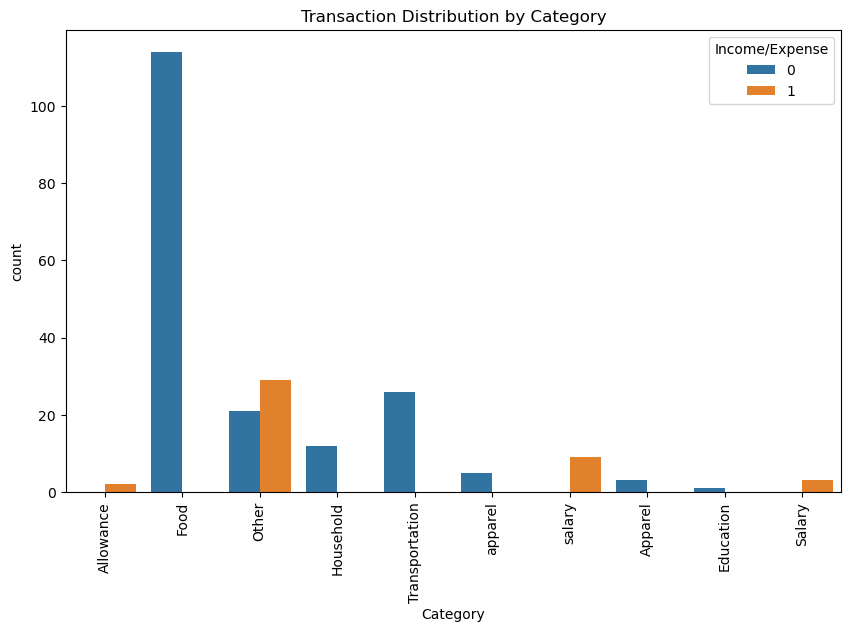

In [49]:
#EDA
plt.figure(figsize=(10,6))
sns.countplot(x='Category', data=df, hue='Income/Expense')
plt.title('Transaction Distribution by Category')
plt.xticks(rotation=90)
plt.show()

In [50]:
#Feature Engg
monthly_expense = df.groupby(['Year','Month'])['Debit/Credit'].sum().reset_index()

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime

In [60]:
x = df[['Mode','Category','Income/Expense','Year','Month','Day']]
y = df['Debit/Credit']

In [61]:
x = pd.get_dummies(x, drop_first=True)

In [62]:
x_train,x_test,y_train,y_test =train_test_split(x, y, test_size=0.2, random_state=42)


In [63]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

In [64]:
y_pred = rf.predict(x_test)

In [66]:
import nltk
from nltk import word_tokenize, pos_tag, ne_chunk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sai\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Sai\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping chunkers\maxent_ne_chunker.zip.
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Sai\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Sai\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [68]:
def interpret_query_nltk(query):
    # Tokenize the query
    tokens = word_tokenize(query)

    
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

   
    pos_tags = pos_tag(filtered_tokens)

    named_entities = ne_chunk(pos_tags)

    
    for entity in named_entities:
        if hasattr(entity, 'label'):
            print(f"Entity: {entity[0][0]}, Label: {entity.label()}")


interpret_query_nltk("How much did I spend on dining last month?")


In [ ]:
from flask import Flask, request, jsonify

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    query = request.json['query']
    # Call your NLP processing function here
    response = interpret_query_nltk(query)  # Replace with the actual function you implemented
    return jsonify({"advice": response})

if __name__ == '__main__':
    # Set debug to False
    app.run(debug=False)


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [22/Oct/2024 10:44:52] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [22/Oct/2024 10:44:52] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [22/Oct/2024 10:45:55] "GET / HTTP/1.1" 404 -
